In [ ]:
# MLDM Assignment
# Name: Inbal Cribian ID: 315861773
# Name: Adi Yogev Golbri ID: 307849869
# Name: Arad Peleg ID: 206068801

#Importing Libraries for work:

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython.display import display
#modles for part D and E: Random Forest, Neural network
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

seed_value = 123; np.random.seed(seed_value); #set_random_seed(seed_value)
rng = np.random.RandomState(123)

In [ ]:
#Reading Csv files from arad git-hub for better access and and definition of probability variables P1 and P2
M1 = pd.read_csv('https://raw.githubusercontent.com/aradpls/MLDM-Assignment-BGU/main/M1.csv', header=None).values.flatten()
M2 = pd.read_csv('https://raw.githubusercontent.com/aradpls/MLDM-Assignment-BGU/main/M2.csv', header=None).values.flatten()
Sigma1 = pd.read_csv('https://raw.githubusercontent.com/aradpls/MLDM-Assignment-BGU/main/Sigma1.csv', header=None)
Sigma2 = pd.read_csv('https://raw.githubusercontent.com/aradpls/MLDM-Assignment-BGU/main/Sigma2.csv', header=None)
P1 = 0.35
P2 = 0.65

In [ ]:
#Showing Data M1
M1

array([6.4406, 5.8386, 6.7494, 7.3581, 7.7655, 4.3671])

In [ ]:
#Showing Data M2
M2

array([6.1988, 5.8464, 6.6064, 6.1153, 6.9309, 4.3697])

In [ ]:
#Showing Data Sigma1
Sigma1

,0,1,2,3,4,5
0,10.28300,-0.26569,-2.66880,0.43490,3.19650,1.77810
1,-0.26569,2.55850,0.84070,-0.30285,1.32800,0.35587
2,-2.66880,0.84070,4.21120,-1.06770,-0.98167,1.16600
3,0.43490,-0.30285,-1.06770,3.59490,-0.93074,0.29652
4,3.19650,1.32800,-0.98167,-0.93074,2.79210,0.83228
5,1.77810,0.35587,1.16600,0.29652,0.83228,2.51670


In [ ]:
#Showing Data Sigma2
Sigma2

,0,1,2,3,4,5
0,9.814600,-3.90650,-3.55000,-0.091772,1.55670,-2.89350
1,-3.906500,3.19780,0.10282,-0.101660,-1.16250,2.24310
2,-3.550000,0.10282,3.74430,0.439830,0.36068,-0.60870
3,-0.091772,-0.10166,0.43983,1.819200,-0.28725,-0.55893
4,1.556700,-1.16250,0.36068,-0.287250,2.51630,-0.68110
5,-2.893500,2.24310,-0.60870,-0.558930,-0.68110,2.61980


In [ ]:
#A.Generate 10,000 observations from the two distributions, proportionate to the a priori probabilities, which will be the training set.
N = 10000

#Converting mean vectors to lists of floats (column vector)
MeanV1 = M1.tolist()
MeanV2 = M2.tolist()
print(M1,M2)

#generating a dataset from two 6-dimensional multivariate normal distributions, and labaling them
train_set = []

for i in range(N):
    if np.random.random() <= P1:
        sample = np.random.multivariate_normal(MeanV1, Sigma1)
        train_set.append(np.append(sample, 1))  # Label 1 for the first distribution (P1)
    else:
        sample = np.random.multivariate_normal(MeanV2, Sigma2)
        train_set.append(np.append(sample, 2))  # Label 2 for the second distribution (P2)

#examples of vectors in train set
print('Examples of vectors in train set with labales:')
print(train_set[1], train_set[2], train_set[3], train_set[4], train_set[5])

[6.4406 5.8386 6.7494 7.3581 7.7655 4.3671] [6.1988 5.8464 6.6064 6.1153 6.9309 4.3697]
Examples of vectors in train set with labales:
[13.55275749  2.10355813  3.48583713  4.06337648  8.99564049  2.84571283
  2.        ] [8.94098828 5.17302739 7.55438837 4.75745012 7.02616439 2.24442129
 2.        ] [3.090961   5.2337701  9.10454352 8.75820562 7.1872053  3.59025534
 2.        ] [ 6.6029277   7.52690912  2.98035835  6.08060015 12.02230815  4.89516581
  1.        ] [3.43521009 4.58488052 7.37698998 6.72279372 6.41161154 4.41448574
 1.        ]


In [ ]:
#B.Compute the MLE estimators for each of the class conditional parameters. Compare them to the true values

#Creating lablel column, and dataframe
columns = [f'Dimension_{i+1}' for i in range(len(M1))] + ['Label']
train_set = pd.DataFrame(train_set, columns=columns)

#Separateing the data by class no need for lable in caculation of MLE (only fetures)
class_1 = train_set[train_set['Label'] == 1].iloc[:, :-1]
class_2 = train_set[train_set['Label'] == 2].iloc[:, :-1]

#Caculating MLE means and varinces of each class
#Class 1 (P1)
mean_class_1 = class_1.mean(axis=0)
var_class_1 = class_1.var(axis=0)
#Class 2 (P2)
mean_class_2 = class_2.mean(axis=0)
var_class_2 = class_2.var(axis=0)

# Printing the MLE estimators for class 1
print("MLE estimators for class 1:")
print("Mean:\n", mean_class_1)
print("-----------------------")
print("Variance:\n", var_class_1)
print("-----------------------")

# Print the MLE estimators for class 2
print("MLE estimators for class 2:")
print("Mean:\n", mean_class_2)
print("-----------------------")
print("Variance:\n", var_class_2)
print("-----------------------")

#compering MLE to true values (diffrences in means and viarince)
#Differences in menas MLE values v.s true value
print("Differences in menas MLE values v.s true vlaues:")
print("Differences for P1: ", '\n', np.abs(mean_class_1 - M1), '\n')
print("-----------------------")
print("Differences for P2: ", '\n', np.abs(mean_class_2 - M2), '\n')

#Differences in Covariance MLE values v.s true value
#first lets remeber that: The diagonal elements of a covariance matrix represents the variances of individual features
#creatin array of diognoal (sigma1,sigma2)

#Sigma 1 diogonal array
sig_dio_1 =[Sigma1[0][0],Sigma1[1][1],Sigma1[2][2],Sigma1[3][3],Sigma1[4][4],Sigma1[5][5]]
#Sigma 2 diogonal array
sig_dio_2 =[Sigma2[0][0],Sigma2[1][1],Sigma2[2][2],Sigma2[3][3],Sigma2[4][4],Sigma2[5][5]]

print("#Differences in Covariance MLE values v.s true values:")
print("Differences for P1: ", '\n', np.abs(var_class_1 - sig_dio_1), '\n')
print("-----------------------")
print("Differences for P2: ", '\n', np.abs(var_class_2 - sig_dio_2), '\n')

MLE estimators for class 1:
Mean:
 Dimension_1    6.409182
Dimension_2    5.813152
Dimension_3    6.772476
Dimension_4    7.354987
Dimension_5    7.738446
Dimension_6    4.377727
dtype: float64
-----------------------
Variance:
 Dimension_1    9.989902
Dimension_2    2.470622
Dimension_3    4.129676
Dimension_4    3.673532
Dimension_5    2.813290
Dimension_6    2.542101
dtype: float64
-----------------------
MLE estimators for class 2:
Mean:
 Dimension_1    6.205408
Dimension_2    5.835632
Dimension_3    6.611981
Dimension_4    6.102487
Dimension_5    6.970911
Dimension_6    4.372034
dtype: float64
-----------------------
Variance:
 Dimension_1    9.697455
Dimension_2    3.223853
Dimension_3    3.692073
Dimension_4    1.808374
Dimension_5    2.588043
Dimension_6    2.631496
dtype: float64
-----------------------
Differences in menas MLE values v.s true vlaues:
Differences for P1:  
 Dimension_1    0.031418
Dimension_2    0.025448
Dimension_3    0.023076
Dimension_4    0.003113
Dimensio

In [ ]:
#C.Generate another set, with 2,000 observations (this will serve as validation set).
N_Val = 2000

#generating a dataset from two 6-dimensional multivariate normal distributions, and labaling them
validation_set = []

for i in range(N_Val):
    if np.random.random() <= P1:
        sample = np.random.multivariate_normal(MeanV1, Sigma1)
        validation_set.append(np.append(sample, 1))  # Label 1 for the first distribution (P1)
    else:
        sample = np.random.multivariate_normal(MeanV2, Sigma2)
        validation_set.append(np.append(sample, 2))  # Label 2 for the second distribution (P2)

#examples of vectors in train set
print('Examples of vectors in train set with labales:')
print(validation_set[1], validation_set[2], validation_set[3], validation_set[4], validation_set[5])

#Creating lablel column, and dataframe for validion set
columns = [f'Dimension_{i+1}' for i in range(len(M1))] + ['Label']
validation_set = pd.DataFrame(validation_set, columns=columns)


Examples of vectors in train set with labales:
[13.75929763  9.35475605  5.51538496  7.70505216 12.28286515  6.09436773
  1.        ] [2.26020551 8.82174086 5.42099417 4.9305142  7.65167915 8.00957687
 2.        ] [6.3625715  5.72788255 8.36628111 7.55364864 5.19545846 3.8444566
 2.        ] [6.12870713 4.68741248 7.38276869 7.25331711 6.01130852 4.4522707
 1.        ] [7.07800829 4.44056114 7.84612961 5.16100076 7.87657852 5.50786208
 1.        ]


In [ ]:
#prepering data for models part: D and E
#traning set
X_train = train_set.iloc[:,:-1] # All columns except the last one
y_train = train_set['Label'] # The last column
#validation set
X_test = validation_set.iloc[:,:-1] # All columns except the last one
y_test = validation_set['Label'] # The last column

In [ ]:
#For part D and E
#helping fucntions: cross-validation, optimization and estimation (evluation)
#we want to know F1-score and accuracy of each fold to stotr then in the process of cross valdation.
#and in the end compute the mean and standard deviation of those metrics

#caulating recall manually
def manuall_recall(TP,FP,TN,FN):
    manuall_recall = TP / (TP + FN)
    return manuall_recall

#caculating precision manually
def manuall_precision(TP,FP,TN,FN):
    manuall_precision = TP / (TP + FN)
    return manuall_precision

#caculating accuracy manually
def manuall_accuracy(y_pred,y_true):
    TP = FP = TN = FN = 0
    for x, y in zip(y_pred, y_true):
        if x == 2 and y == 2:
            TP += 1
        elif x == 1 and y == 2:
            FN += 1
        elif x == 1 and y == 1:
            TN += 1
        elif x == 2 and y == 1:
            FP += 1
    manuall_accuracy = (TP + TN) / (TP + TN + FP + FN)
    return manuall_accuracy

#caculating F1-Score manually for generalization errors
def F1score_manually(y_pred, y_true):
    TP = FP = TN = FN = 0
    for x, y in zip(y_pred, y_true):
        if x == 2 and y == 2:
            TP += 1
        elif x == 1 and y == 2:
            FN += 1
        elif x == 1 and y == 1:
            TN += 1
        elif x == 2 and y == 1:
            FP += 1
    recall = manuall_recall(TP,FP,TN,FN)
    precision = manuall_precision(TP,FP,TN,FN)
    if precision + recall == 0:
        F1_score = 0
    else:
        F1_score = 2 * precision * recall / (precision + recall)
    return F1_score

#creating a manuall cross validation function
def custom_cv_kfold(train_set,model,k_fold = 10):
    train_set = train_set.sample(frac=1, random_state=12).reset_index(drop=True)
    fold_size = train_set.shape[0] // k_fold

    accuracies = [] #accuracy later for mean and variance of all folds
    F1_scores = [] #F1_ score later for mean and variance of all folds (generalization errors)

    for i in range(k_fold):
    # Determing the start and end indices for the validation fold
      start = i * fold_size
      end = start + fold_size if i != k_fold - 1 else train_set.shape[0]

    #Creating validation and traning set from traning set
      # Define the validation set
      test_set = train_set.iloc[start:end]
      X_test_cross = test_set.iloc[:, :-1]  # All columns except the last one
      y_test_cross = test_set.iloc[:, -1]   # The last column

      # Defining the train set by excluding the validation set
      train_indices = list(range(start)) + list(range(end, train_set.shape[0]))
      train_subset = train_set.iloc[train_indices]
      X_train_cross = train_subset.iloc[:, :-1]  # All columns except the last one
      y_train_cross = train_subset.iloc[:, -1]   # The last column

      # Fiting the model
      model_fit = model.fit(X_train_cross, y_train_cross)

      # Predicting on the validation set set
      predictions = model_fit.predict(X_test_cross)

      # Computing metrics
      acc = manuall_accuracy(predictions, y_test_cross)
      accuracies.append(acc)
      F1 = F1score_manually(predictions, y_test_cross)
      F1_scores.append(F1)

    cross_acc_mean = np.mean(accuracies)
    cross_acc_var = np.var(accuracies)
    cross_F1_mean = np.mean(F1_scores)
    cross_F1_var =  np.var(F1_scores)

    return cross_acc_mean, cross_acc_var, cross_F1_mean, cross_F1_var

In [ ]:
#Randon forest classifier for part D : model,best forest and manuall cross validation

#crearing a helping function that will help as to decide which forest is the best
def best_RF(X_train,y_train,X_test,y_test):
  best_accuracy = 0
  best_tree = 0
  forest = range(100,1000,100)
  for trees in forest:
    RF = RandomForestClassifier(random_state=123, n_estimators=trees)
    model_RF_fit = RF.fit(X_train,y_train)
    predictions = model_RF_fit.predict(X_test)
    acc = manuall_accuracy(predictions,y_test)
    if acc > best_accuracy:
      best_accuracy = acc
      best_tree = trees
  return best_accuracy, best_tree

#get the best tree for highest accuracy
best_accuracy, best_tree =  best_RF(X_train,y_train,X_test,y_test)
print('Random forest accuracy:',best_accuracy)
print('Random forest best tree in the range of 100 to 1000 is:',best_tree)
print("-----------------------")

#Using maual cross valdation with best tree on random forest calssifier and to showing mean and var acc and f1-score
model1 = RandomForestClassifier(random_state=123, n_estimators=best_tree)
cross_acc_mean, cross_acc_var, cross_F1_mean, cross_F1_var = custom_cv_kfold(train_set,model1,k_fold = 10)
print('Random forest accuracy for 10 cv is:',f'{cross_acc_mean:.4f}','with variance of:',f'{cross_acc_var:.4e}')
print('Random forest F1-Score (generalization error) for 10 cv is:',f'{cross_F1_mean:.4f}','with variance of:',f'{cross_F1_var:.4e}')
print("-----------------------")

Random forest accuracy: 0.917
Random forest best tree in the range of 100 to 1000 is: 700
-----------------------
Random forest accuracy for 10 cv is: 0.9105 with variance of: 6.9650e-05
Random forest F1-Score (generalization error) for 10 cv is: 0.9529 with variance of: 8.2848e-05
-----------------------


In [ ]:
#MLP (neuaral network) classifier for part E : model,best forest and manuall cross validation

#crearing a helping function that will help as to decide which forest is the best
def best_MLP(X_train,y_train,X_test,y_test):
  best_accuracy = 0
  best_neuron = 0
  Neurons = range(10,100,10) #heavy modeling so we picked a little range for easyer runing
  for neuron in Neurons:
    MLP = MLPClassifier(random_state = 123,hidden_layer_sizes = Neurons, max_iter = 1000)
    model_MLP_fit = MLP.fit(X_train,y_train)
    predictions = model_MLP_fit.predict(X_test)
    acc = manuall_accuracy(predictions,y_test)
    if acc > best_accuracy:
      best_accuracy = acc
      best_neuron = neuron
  return best_accuracy, best_neuron

#get the best tree for highest accuracy
best_accuracy2, best_neuron =  best_MLP(X_train,y_train,X_test,y_test)
print('MLP accuracy:',best_accuracy2)
print('MLP best neuron in the range of 10 to 100 is:',best_neuron)
print("-----------------------")

#Using maual cross valdation with best tree on random forest calssifier and to showing mean and var acc and f1-score
model2 = MLPClassifier(random_state = 123,hidden_layer_sizes = best_neuron, max_iter = 1000)
cross_acc_mean2, cross_acc_var2, cross_F1_mean2, cross_F1_var2 = custom_cv_kfold(train_set,model2,k_fold = 10)
print('MLP accuracy for 10 cv is:',f'{cross_acc_mean2:.4f}','with variance of:',f'{cross_acc_var2:.4e}')
print('MLP F1-Score (generalization error) for 10 cv is:',f'{cross_F1_mean2:.4f}','with variance of:',f'{cross_F1_var2:.4e}')
print("-----------------------")

MLP accuracy: 0.9175
MLP best neuron in the range of 10 to 100 is: 10
-----------------------
MLP accuracy for 10 cv is: 0.9241 with variance of: 8.1290e-05
MLP F1-Score (generalization error) for 10 cv is: 0.9570 with variance of: 1.0263e-04
-----------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

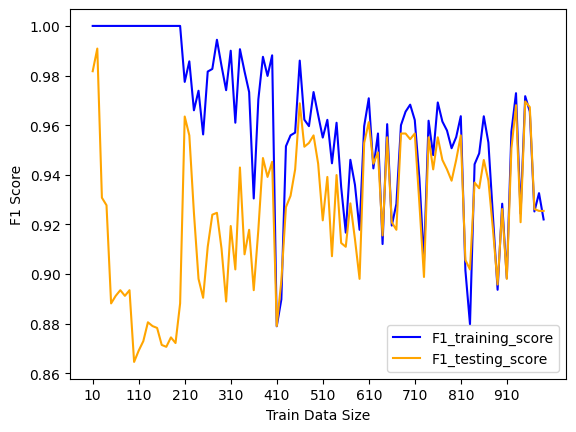

In [ ]:
#F.Choose one of the two models above. We will now consider the overfitting
#phenomenon as a function of training set size. Fit the model with training sets of
#size 𝑁 = 10, 20, 30, … ,1,000. Plot the test and training error as a function of 𝑁.
#For estimating test error, use the validation set
#choosing MLP for better prefomance

def overfitting_phenomenon(train_set,X_test,y_test):

  train_scores = []
  test_scores = []
  N_data = range(10,1000,10)
  for N in N_data:
    data_training = train_set.sample(N, random_state = 123)
    X_train = data_training.iloc[:,:-1]
    y_train = data_training.iloc[:,-1]
    MLP = MLPClassifier(random_state = 123,hidden_layer_sizes = 500, max_iter = 1000)
    model_fit = MLP.fit(X_train,y_train)
    train_pred = model_fit.predict(X_train)
    test_pred = model_fit.predict(X_test)
    F1_train = F1score_manually(train_pred,y_train)
    F1_test = F1score_manually(test_pred,y_test)
    train_scores.append(F1_train)
    test_scores.append(F1_test)
  #Line plot for F1 traning score
  plt.plot(N_data, train_scores, label = "F1_training_score", color = "blue" )
  #Line plot for F1 testing score
  plt.plot(N_data, test_scores, label = "F1_testing_score", color = "orange" )
  #X-axis title
  plt.xlabel('Train Data Size')
  #Y-axis title
  plt.ylabel('F1 Score')
  #legnd to see what each line represents
  plt.legend(loc = 'lower right',fontsize = 'medium')
  #arranging x axis numbers in jump of ten
  plt.xticks(np.arange(start=10, stop=1000+10, step=100))
  #showing the plot
  plt.show()

  overfitting_phenomenon(train_set,X_test,y_test)
